Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading

In [2]:
# Assuming 'df' is your DataFrame
df = pd.read_csv('JC1_all_compounds_for_plotting.csv')

Plotting    

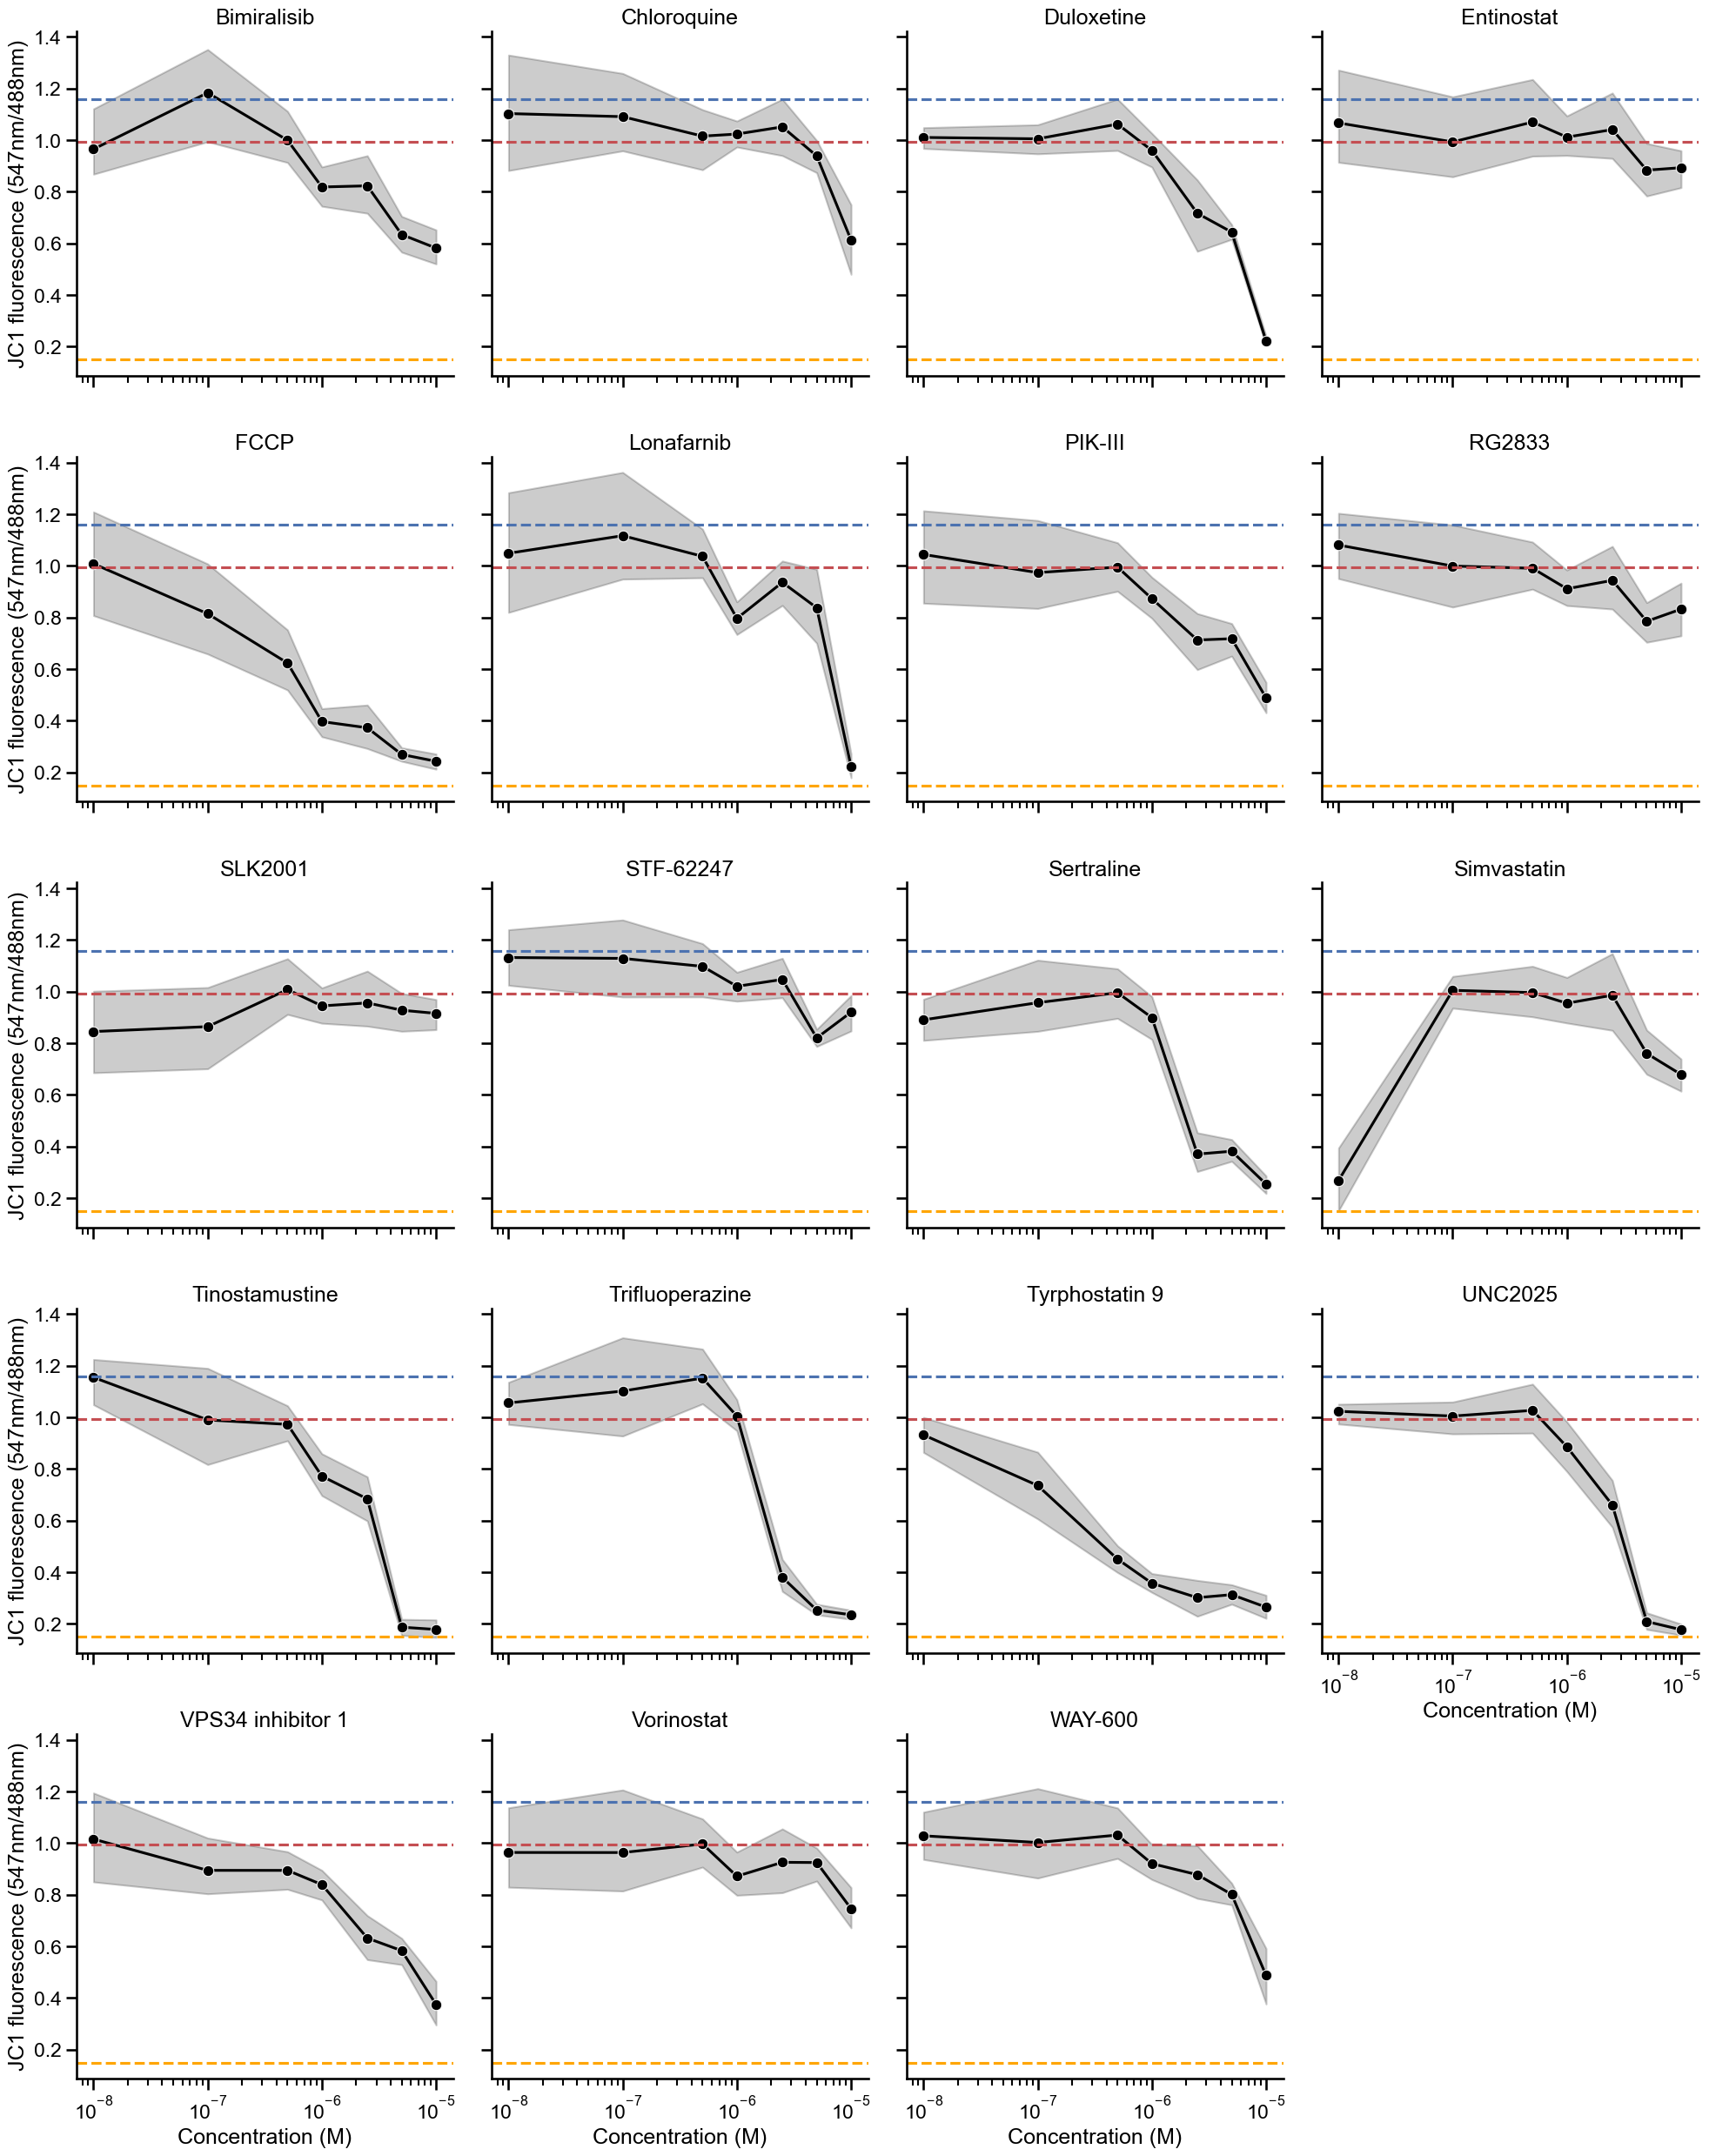

In [3]:
# Create a list of compounds to exclude from the plot
exclude_compounds = ['GC', 'GC+Val', 'SNCA Trpl.']

# Create a new DataFrame excluding the specified compounds
plot_df = df[~df['Compound'].isin(exclude_compounds)]

# Define colors for the dashed lines
colors = ['#4C72B0', 'orange', '#C44E52']

# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Plot line plots in facet grid using relplot
g = sns.relplot(
    data=plot_df,
    x='Concentration (M)', y='value',
    col="Compound",
    kind="line",
    marker='o',
    dashes=False,
    col_wrap=4,
    color='black'
)

# Remove 'Compound =' from each subplot title, keeping only the actual compound name
for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title.split('=')[1].strip())

# Calculate the median values of the excluded compound
for i, compound in enumerate(exclude_compounds):
    median_value = df[df['Compound'] == compound]['value'].median()
    # Add median values as dashed lines to plot
    for ax in g.axes.flat:
        ax.axhline(y=median_value, linestyle='--', color=colors[i], label=f'{compound} median')

# Transform the x-axis scale to log
g.set(xscale="log")

# Set plot title and labels
g.set(xlabel='Concentration (M)')
g.set(ylabel='JC1 fluorescence (547nm/488nm)')

# Save plot as PDF
plt.savefig('JC1_all_compounds' + '.pdf', bbox_inches='tight')

# Show the plot
plt.show()